<a href="https://colab.research.google.com/github/mmartin46/Data_Science_Research/blob/main/SpotifyResearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# John 3:5

In [1]:
import pandas as pd
import altair as alt
from altair import Chart, X, Y, Color, Scale
import datetime as dt
import matplotlib.pyplot as plt
from pandas.core.common import random_state
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
df = pd.read_csv('/content/Spotify_Song_Attributes.csv')

In [3]:
df.head(10)

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,"""Honest""",Nico Collins,191772,NaN,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.2570,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.1010,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.3660,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.1190,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.0625,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0
5,(L)only Child,salem ilese,2237969,alt z,0.645,0.611,8.0,-5.925,0.0,0.1370,...,0.2370,0.645,157.475,audio_features,22lJaG2yxlSjIwdUIddcFk,spotify:track:22lJaG2yxlSjIwdUIddcFk,https://api.spotify.com/v1/tracks/22lJaG2yxlSj...,https://api.spotify.com/v1/audio-analysis/22lJ...,144468.0,3.0
6,(lol),Eren Cannata,441335,guitar case,0.663,0.904,7.0,-4.710,1.0,0.0857,...,0.3410,0.675,118.024,audio_features,4DS2UXeR2V5W7R9aype6t1,spotify:track:4DS2UXeR2V5W7R9aype6t1,https://api.spotify.com/v1/tracks/4DS2UXeR2V5W...,https://api.spotify.com/v1/audio-analysis/4DS2...,217627.0,4.0
7,-Interlude-,NF,70589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,120005,cloud rap,0.792,0.511,2.0,-6.876,1.0,0.0409,...,0.1400,0.111,113.983,audio_features,30QR0ndUdiiMQMA9g1PGCm,spotify:track:30QR0ndUdiiMQMA9g1PGCm,https://api.spotify.com/v1/tracks/30QR0ndUdiiM...,https://api.spotify.com/v1/audio-analysis/30QR...,168490.0,4.0
9,...Baby One More Time,Britney Spears,107407,dance pop,0.759,0.699,0.0,-5.745,0.0,0.0307,...,0.4430,0.907,92.960,audio_features,3MjUtNVVq3C8Fn0MP3zhXa,spotify:track:3MjUtNVVq3C8Fn0MP3zhXa,https://api.spotify.com/v1/tracks/3MjUtNVVq3C8...,https://api.spotify.com/v1/audio-analysis/3MjU...,211067.0,4.0


In [4]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
results = []

for column in numeric_columns:
  arg = df[column]
  results.insert(-1, f"{column} : {df['danceability'].corr(arg)} ")

sorted
for result in results:
  print(result)

danceability : 0.9999999999999998 
energy : 0.2777290641759512 
key : 0.020129894890396106 
loudness : 0.32583552554764733 
mode : -0.04604210095635064 
speechiness : 0.18033976447517788 
acousticness : -0.2611989850759337 
instrumentalness : -0.22984791106050578 
liveness : 0.006503414344826755 
valence : 0.4847604865886499 
tempo : 0.009501444086718621 
duration_ms : -0.120999413812037 
time_signature : 0.22002713663659534 
msPlayed : -0.017254057837787797 


<ipython-input-5-01debda605a5>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='crest')


<Axes: >

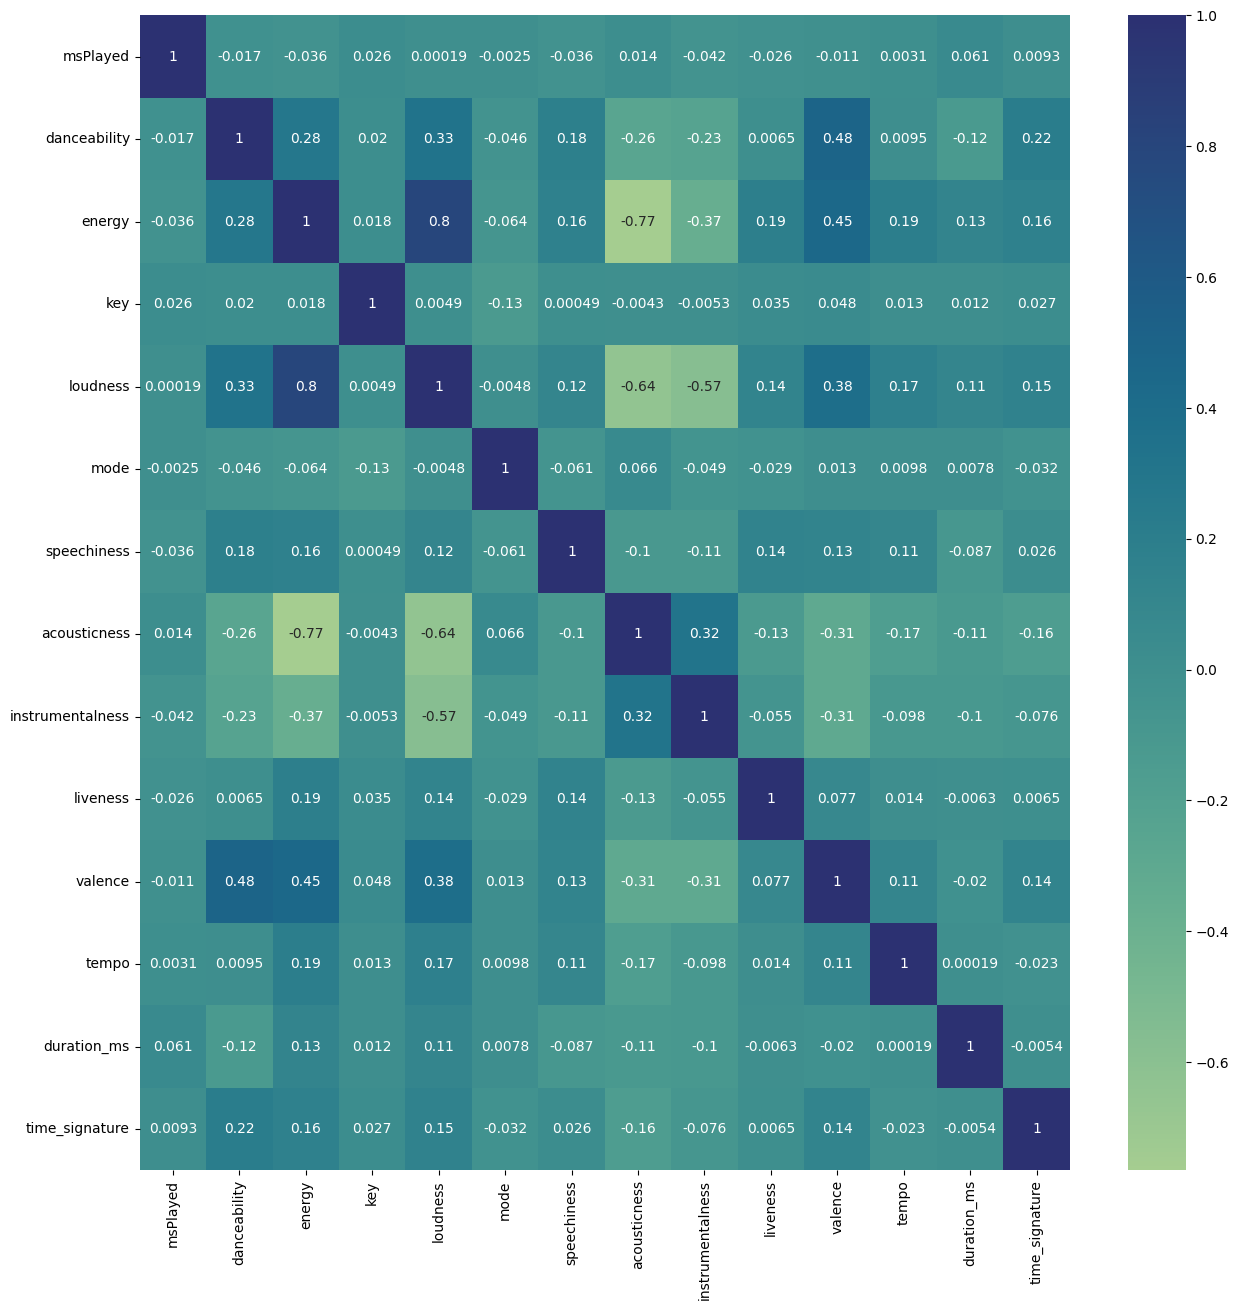

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(df.corr(), annot=True, cmap='crest')

In [6]:
from sklearn import preprocessing

n_df = df.select_dtypes(include=np.number)


def scaleDataSet(df):
  mm_scaler = preprocessing.MinMaxScaler()
  df_scaled = mm_scaler.fit_transform(df.to_numpy())
  df_scaled = pd.DataFrame(df_scaled, columns=list(numeric_columns))
  return df

df = scaleDataSet(n_df)
df.dropna(inplace=True)

X_test, X_train, y_test, y_train = train_test_split(df['danceability'], df['valence'], test_size=.2, random_state=997)
X_test = np.array(X_test).reshape(-1, 1)
X_train = np.array(X_train).reshape(-1, 1)

In [50]:
class DataProcessor:
    def __init__(self, df):
      self.df = df
      self.numeric_columns = self.df.select_dtypes(include=[np.number]).columns
      self.X_train = []
      self.y_train = []
      self.X_test = []
      self.y_test = []
      self.pred = []

    def clean(self):
        self.df.dropna(inplace=True)

    def scale(self):
        mm_scaler = preprocessing.MinMaxScaler()
        df_scaled = mm_scaler.fit_transform(self.df.to_numpy())
        df_scaled = pd.DataFrame(df_scaled, columns=list(numeric_columns))
        self.df = df_scaled

    def split(self, x, y):
        self.X_test, self.X_train, self.y_test, self.y_train = train_test_split(df[x], df[y], test_size=.2, random_state=997)
        self.X_test = np.array(X_test).reshape(-1, 1)
        self.X_train = np.array(X_train).reshape(-1, 1)

    def train(self, model):
        mod = model
        mod.fit(self.X_train, self.y_train)
        self.pred = mod.predict(X_train)
        return self.pred

    def makePlot(self, ax, title_, labX, labY):

        ax.scatter(self.X_train, self.y_train, label='training samples')
        ax.plot(self.X_train, self.pred, color='red', label='prediction')

        ax.set(
          title=title_,
          xlabel=labX,
          ylabel=labY
        )
        ax.legend()
        return ax


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
lr = BayesianRidge()
lr.fit(X_train, y_train)

BayesianRidge()

In [52]:
lr.score(X_train, y_train)

0.22327630429052958

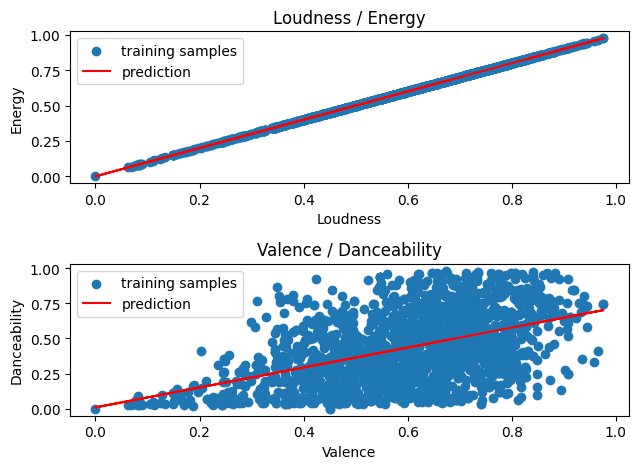

In [53]:
coord_ = {
    'loudness' : 'energy',
    'danceability' : 'valence',
    'loudness' : 'danceability'
}

labels = {
    '1st' : ['Loudness / Energy', 'Loudness', 'Energy'],
    '2nd' : ['Valence / Danceability', 'Valence', 'Danceability'],
    '3rd' : ['Loudness / Danceability', 'Loudness', 'Danceability']
}

fig, ax = plt.subplots(2)

i = 0
for (k, v), (k2, v2) in zip(coord_.items(), labels.items()):
  dp = DataProcessor(df)
  dp.clean()
  dp.scale()
  dp.split(k, v)
  dp.train(BayesianRidge())
  dp.makePlot(ax=ax[i], title_=v2[0], labX=v2[1], labY=v2[2])
  i += 1
plt.tight_layout()